# Computational Project 1.1

The position of a particle as a function of time is given by $x = 5t^3 — 2t$ (in
meters). Plot the position as a function of time for the interval $t = —5s$ to $t = +10s$. Using the relationship
$v = \frac x t$, obtain the average velocity at intervals of 1 second. Plot the average velocity as a function of
time and, on the same graph, plot the analytical expression for the velocity.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy as sp

In [3]:
# Define the time interval
t = np.linspace(-5, 10, 1000)

# Calculate the position of the particle using the given function
x = 5 * t**3 - 2 * t

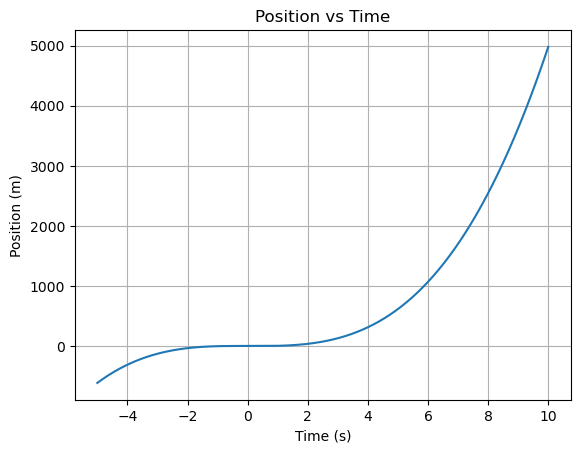

In [4]:
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time')
plt.grid(True)
plt.show()

In [5]:
# Calculate the average velocity at intervals of 1 second
dt = 1  # Time interval for calculating average velocity
t_avg = np.arange(-5, 11, dt)  # Time points at intervals of 1 second
v_avg = (5 * t_avg**3 - 2 * t_avg) / t_avg  # Average velocity calculation

/var/folders/24/ggylxxcj3xq362xbyt3gkg_00000gn/T/ipykernel_26767/2810108803.py:4: RuntimeWarning: invalid value encountered in divide
  v_avg = (5 * t_avg**3 - 2 * t_avg) / t_avg  # Average velocity calculation


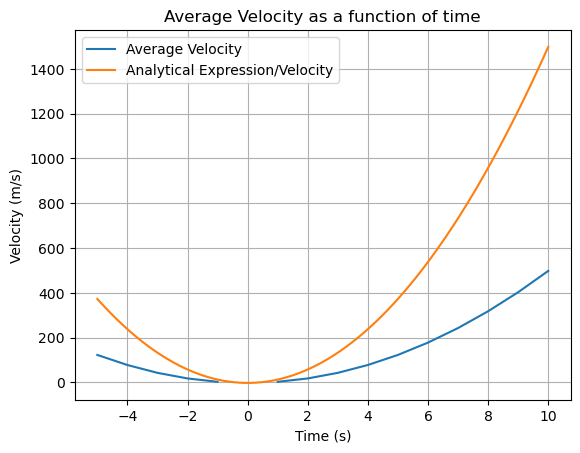

In [6]:
# Plot the average velocity and analytical expression for velocity
plt.plot(t_avg, v_avg, label='Average Velocity')
plt.plot(t, 15 * t**2 - 2, label='Analytical Expression/Velocity') # First Derivative of Position
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Average Velocity as a function of time')
plt.legend()
plt.grid(True)
plt.show()

# Problem 1.11

Atwood's machine consists of two weights ($M_1$ and $M_2$) suspended at the ends of a string that passes over a pulley. Assume massless, inextensible strings and a firctionless pulley.

Let $M_1$ = 6kg and $M_2$ = 5.5kg. The masses are released form rest. Determine the distance descended by the 6kg mass when its velocity reaches 0.5 $\frac m s$

## System Analysis

Start with Newton's Second Law applied to whole system 
$$\Sigma F = M_{12} a_y$$

Rearrange to find expression for $a_y$
$$ a_y = \frac{\Sigma F}{M_{12}}$$

$$ a_y = \frac{M_1 g - M_2 g}{M_{12}}$$


### Kinematic Equation

$$
2a_y(y-y_0) = \vec{v}^2 - \vec{v_0}^2
$$

$$
\Delta y = \frac{\vec{v}^2 - \vec{v_0}^2}{2a_y} \qquad [\vec{v_0} = 0 \because \text{released from rest}]
$$


Substitute expression for $a_y$

$$
\Delta y = \frac{M_{12}\vec{v}^2}{2(M_1 g - M_2 g)}
$$

Expression for distance descended by $M_1$
$$
\Delta y = \frac{M_{12}\vec{v}^2}{2g(M_1 - M_2)}
$$

In [7]:
m1 = 6 #kg
m2 = 5.5 #kg

v = 0.5 #m/s

g = 9.8 #m/s^2

y = ((m1 + m2) * v**2) / (2 * g * (m1 - m2)) #m
y=y*(10**2) #cm
print(f'{y:.1f} cm') 

29.3 cm


# Computational Project 4.1 
Use a symbolic manipulator such as sympy to obtain the Hamiltonian for the
double planar pendulum.

Lagrange's Equations:
-2*g*l*m*sin(theta1(t)) + m*(2*l*(l*sin(theta1(t))*Derivative(theta1(t), t) + l*sin(theta2(t))*Derivative(theta2(t), t))*cos(theta1(t))*Derivative(theta1(t), t) - 2*l*(l*cos(theta1(t))*Derivative(theta1(t), t) + l*cos(theta2(t))*Derivative(theta2(t), t))*sin(theta1(t))*Derivative(theta1(t), t))/2 - m*(2*l**2*sin(theta1(t))**2*Derivative(theta1(t), (t, 2)) + 2*l**2*cos(theta1(t))**2*Derivative(theta1(t), (t, 2)) + 2*l*(l*sin(theta1(t))*Derivative(theta1(t), t) + l*sin(theta2(t))*Derivative(theta2(t), t))*cos(theta1(t))*Derivative(theta1(t), t) - 2*l*(l*cos(theta1(t))*Derivative(theta1(t), t) + l*cos(theta2(t))*Derivative(theta2(t), t))*sin(theta1(t))*Derivative(theta1(t), t) + 2*l*(-l*sin(theta1(t))*Derivative(theta1(t), t)**2 - l*sin(theta2(t))*Derivative(theta2(t), t)**2 + l*cos(theta1(t))*Derivative(theta1(t), (t, 2)) + l*cos(theta2(t))*Derivative(theta2(t), (t, 2)))*cos(theta1(t)) + 2*l*(l*sin(theta1(t))*Derivative(theta1(t), (t, 2)) + l*sin(theta2(t))*Derivati

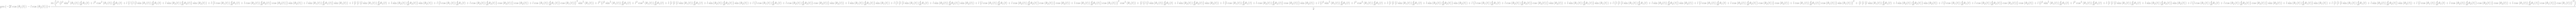

In [19]:
# use sympy to find hamilonian of double planar pendulum
# Define the symbols
sym.init_printing()
m, l, g = sym.symbols('m l g')
theta1, theta2 = sym.symbols('theta1 theta2', cls=sym.Function)
t = sym.symbols('t')

# Define the positions of the masses
x1 = l * sym.sin(theta1(t))
y1 = -l * sym.cos(theta1(t))
x2 = x1 + l * sym.sin(theta2(t))
y2 = y1 - l * sym.cos(theta2(t))

# Define the velocities of the masses
x1_dot = x1.diff(t)
y1_dot = y1.diff(t)
x2_dot = x2.diff(t)
y2_dot = y2.diff(t)

# Define the kinetic energy of the system
T = (m / 2) * (x1_dot**2 + y1_dot**2 + x2_dot**2 + y2_dot**2)

# Define the potential energy of the system
V = m * g * (y1 + y2)

# Define the Lagrangian
L = T - V

# Define the generalized coordinates
q1 = theta1(t)
q2 = theta2(t)

# Define the generalized velocities
q1_dot = q1.diff(t)
q2_dot = q2.diff(t)

# Define the generalized forces
Q1 = 0
Q2 = 0

# Define the Lagrange's equations
LE1 = L.diff(q1) - sym.diff(L.diff(q1_dot), t) - Q1
LE2 = L.diff(q2) - sym.diff(L.diff(q2_dot), t) - Q2

# Display the Lagrange's equations
print('Lagrange\'s Equations:')
print(LE1)
print(LE2)

# Define the Hamiltonian
H = T + V

# Display the Hamiltonian
print('Hamiltonian:')
print(H)

# Define the momenta
p1 = sym.diff(L, q1_dot)
p2 = sym.diff(L, q2_dot)

# Define the Hamiltonian in terms of the momenta
H_p = H.subs({q1_dot: p1 / m, q2_dot: p2 / m})

# Display the Hamiltonian in terms of the momenta in latex rendered form
print('Hamiltonian in terms of the momenta:')
H_p


